# Linear Regression from scratch

In [1]:
# Import libraries
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# Create linear regression class
class LinearRegression():
    '''
    A class that implements linear regression using gradient descent algorithm
    '''
    def __init__(self, alpha=0.1, epochs=1000):
        self.alpha = alpha # Learning rate
        self.epochs = epochs # Number of iterations
        
    def fit(self, x, y):
        '''
        Calculate the slope and y-intercept using gradient descent
        '''
        # Initialize variables
        self.slope = 0
        self.intercept = 0
        self.sample_size = float(len(y))
        self.cost = 0 
        self.iterations = 0
        self.loss = []
        
        # Perform gradient descent
        for i in range(self.epochs):
            y_pred = self.slope*x + self.intercept # Current predicted value of y
            mse = (1/self.sample_size) * sum([val**2 for val in (y - y_pred)]) # MSE function as cost function
            self.loss.append(mse)
            
            # Calculate partial derivatives with respect to slope and intercept
            Dm = (-2/self.sample_size) * sum(x*(y - y_pred))
            Db = (-2/self.sample_size) * sum(y - y_pred)
            
            # Update values of slope and intercept
            self.slope -= self.alpha*Dm
            self.intercept -= self.alpha*Db
            
            # Update iterations
            self.iterations = i
            
            # Compare previous cost with current cost. Stop loop when costs are similar
            if math.isclose(mse, self.cost, rel_tol=1e-20):
                break
                
            # Update previous cost value
            self.cost = mse
        
        return self
            
    def predict(self, x):
        '''
        Make predictions using the line equation
        '''
        return np.dot(x, self.slope) + self.intercept

In [3]:
# Generate random sample data
x, y = make_regression(n_samples=200, n_features=1, noise=35, random_state=42)
x = np.reshape(x, x.shape[0])

# Call linear regression model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

# Print results
print('Gradient Descent reached its minimum value!\
\nIterations: {}   | Cost: {}'.format(model.iterations, round(model.cost,2)))

# Print slope and y-intercept optimal values and the Hypothesis
print('Slope:= {} | Y-intercept:= {}'.format(round(model.slope,2), round(model.intercept,2)))
print('y = {}x + {}'.format(round(model.slope,2), round(model.intercept,2)))

Gradient Descent reached its minimum value!
Iterations: 102   | Cost: 1244.98
Slope:= 86.44 | Y-intercept:= 5.0
y = 86.44x + 5.0


In [4]:
import pandas as pd

# Initialise data of lists.
data = {'Model Attributes':['Slope', 'Intercept', 'Sample size', 'Cost', 'Number of iterations'],
        'Values':[model.slope, model.intercept, model.sample_size, model.cost, model.iterations]}

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Model Attributes', 'Values'])
df['Values'] = round(df['Values'], 2)

# Print dataframe.
df

,Model Attributes,Values
0,Slope,86.44
1,Intercept,5.00
2,Sample size,200.00
3,Cost,1244.98
4,Number of iterations,102.00


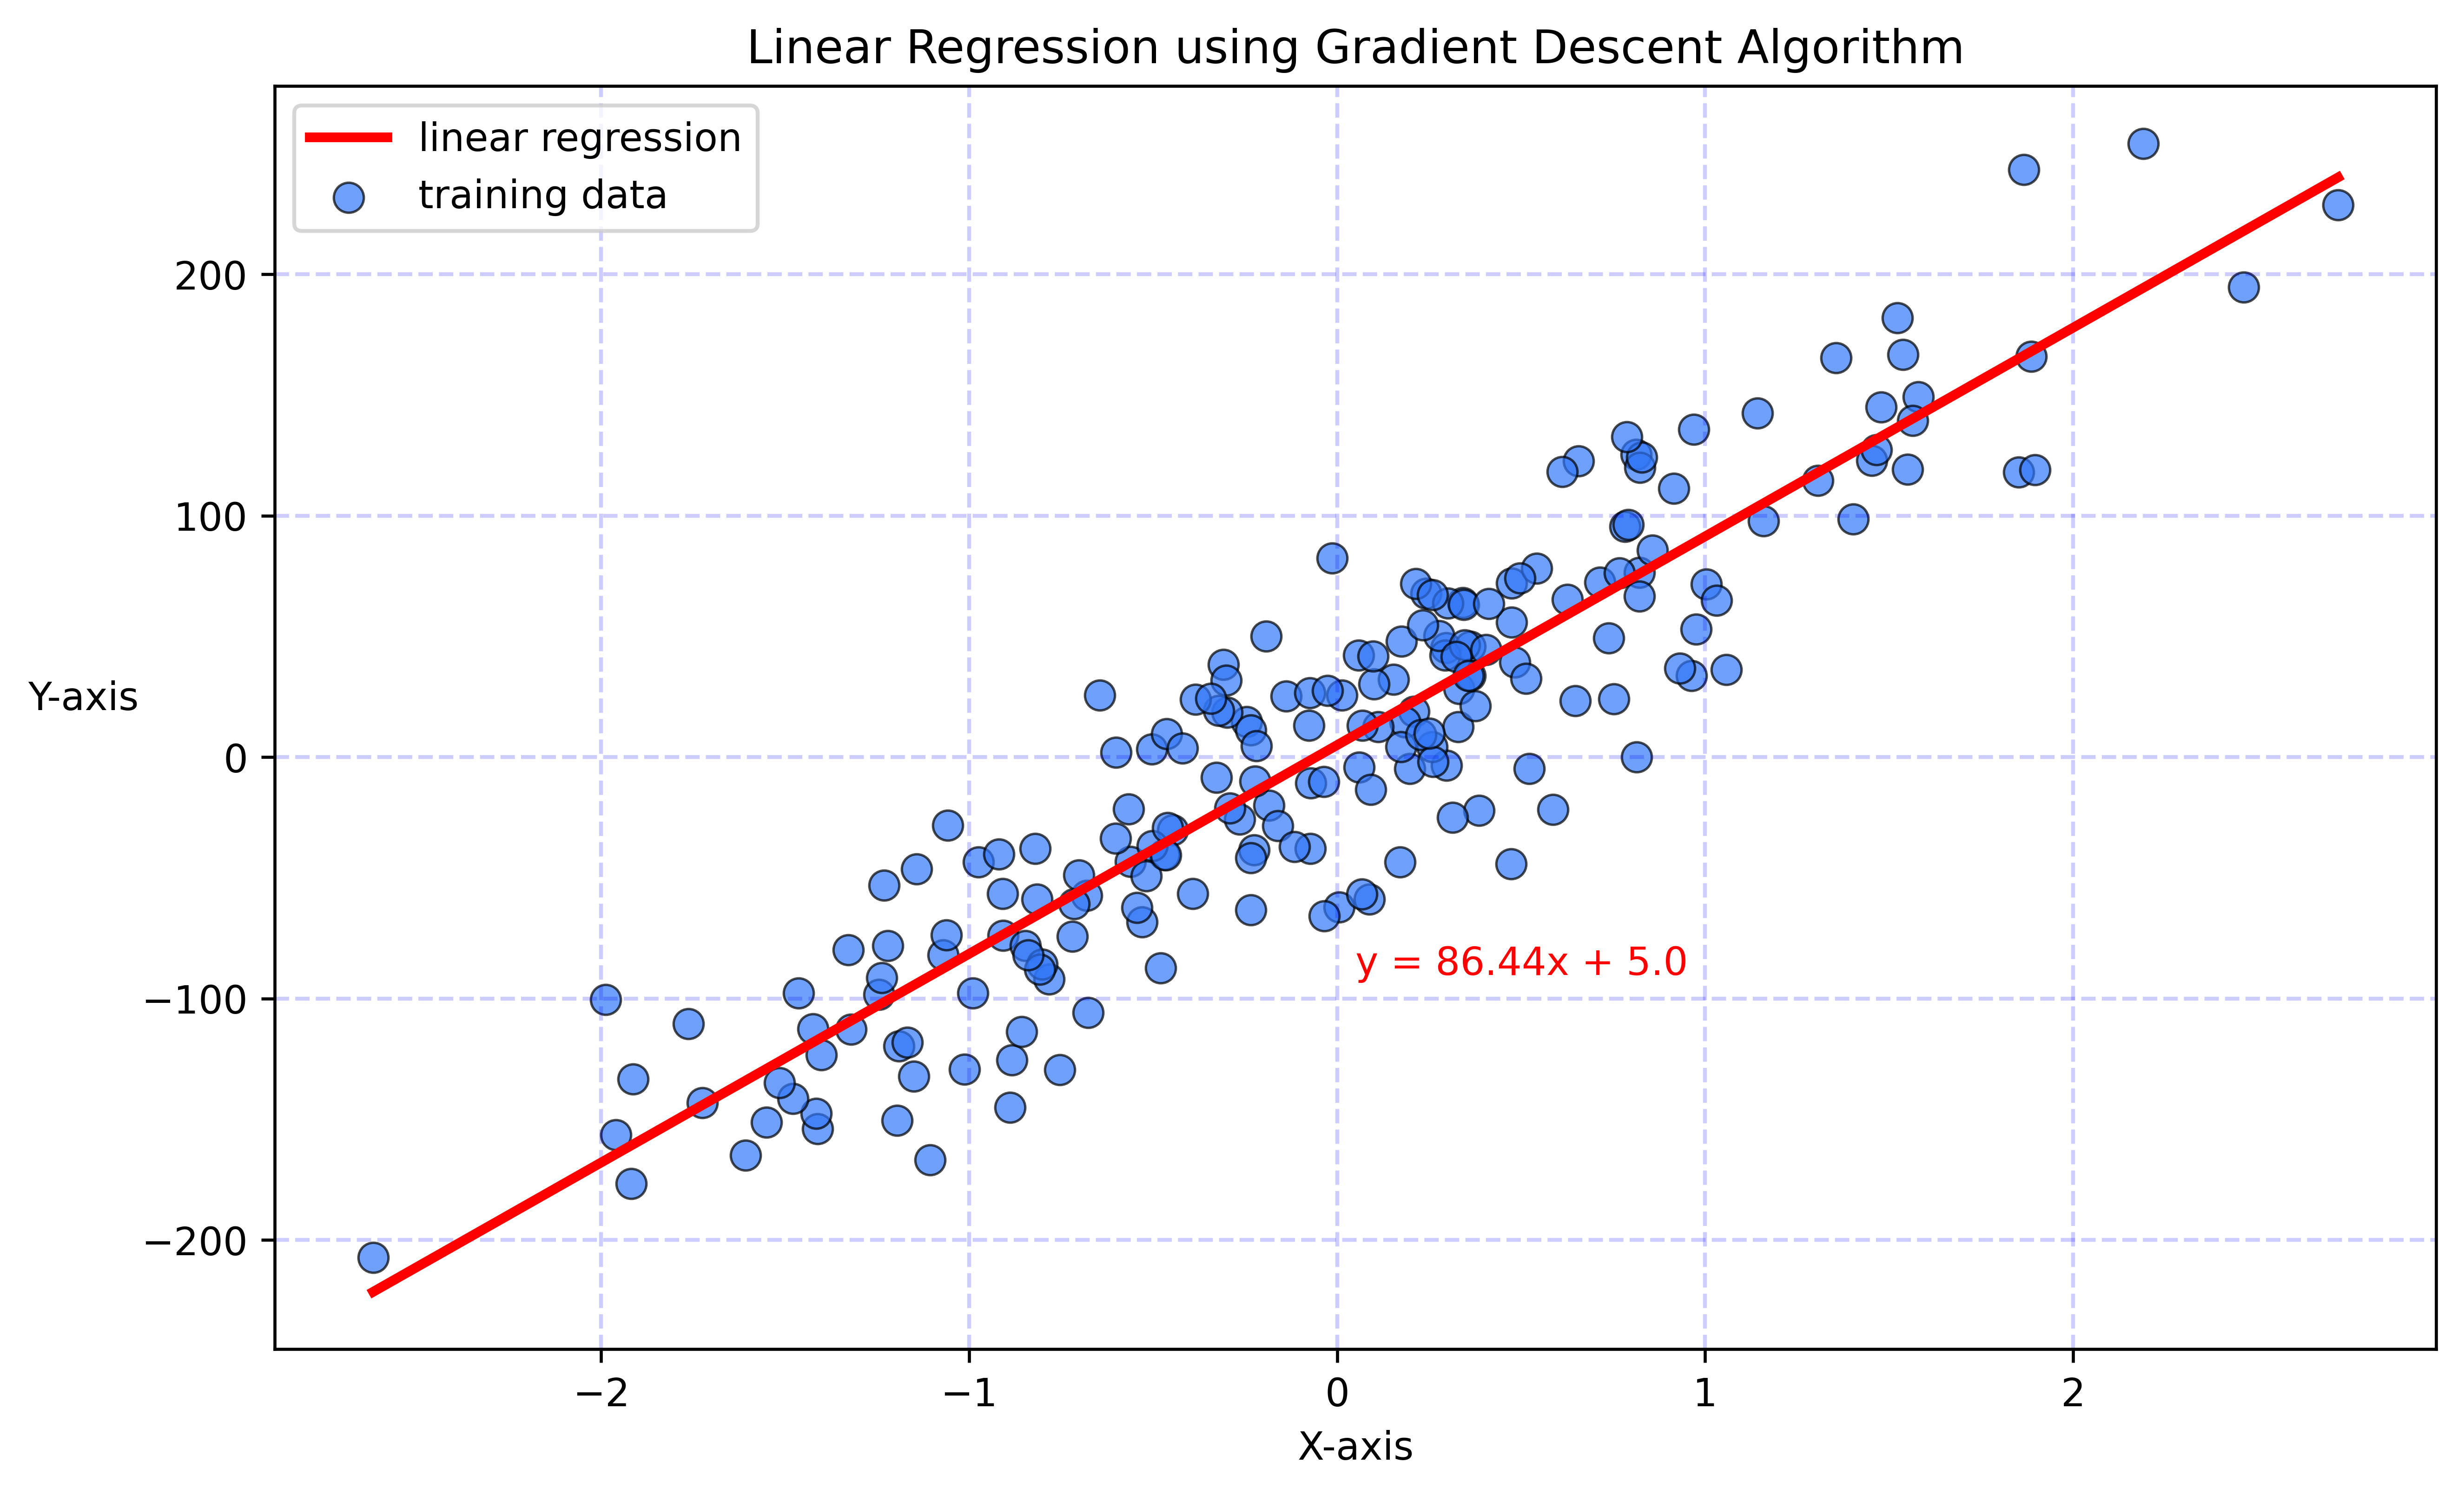

In [5]:
# Assign optimal values to the Hypothesis
y_pred = model.predict(x)

# Plot Linear Regression graph
plt.figure(figsize=(10,6), dpi=600)
plt.title('Linear Regression using Gradient Descent Algorithm')
plt.xlabel("X-axis")
plt.ylabel("Y-axis", rotation=0, labelpad=15)
plt.text(0.05, -90, 'y = {}x + {}'.format(round(model.slope,2),round(model.intercept,2)), color='red', fontsize=10)
sns.scatterplot(x=x, y=y, color='#3176f7', label='training data', edgecolor='black', s=60, alpha=0.7)
sns.lineplot(x=x, y=y_pred, color='red', label='linear regression', linewidth=2.5)
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc='upper left')
# plt.savefig('Linear_Regression.jpg')
plt.show()

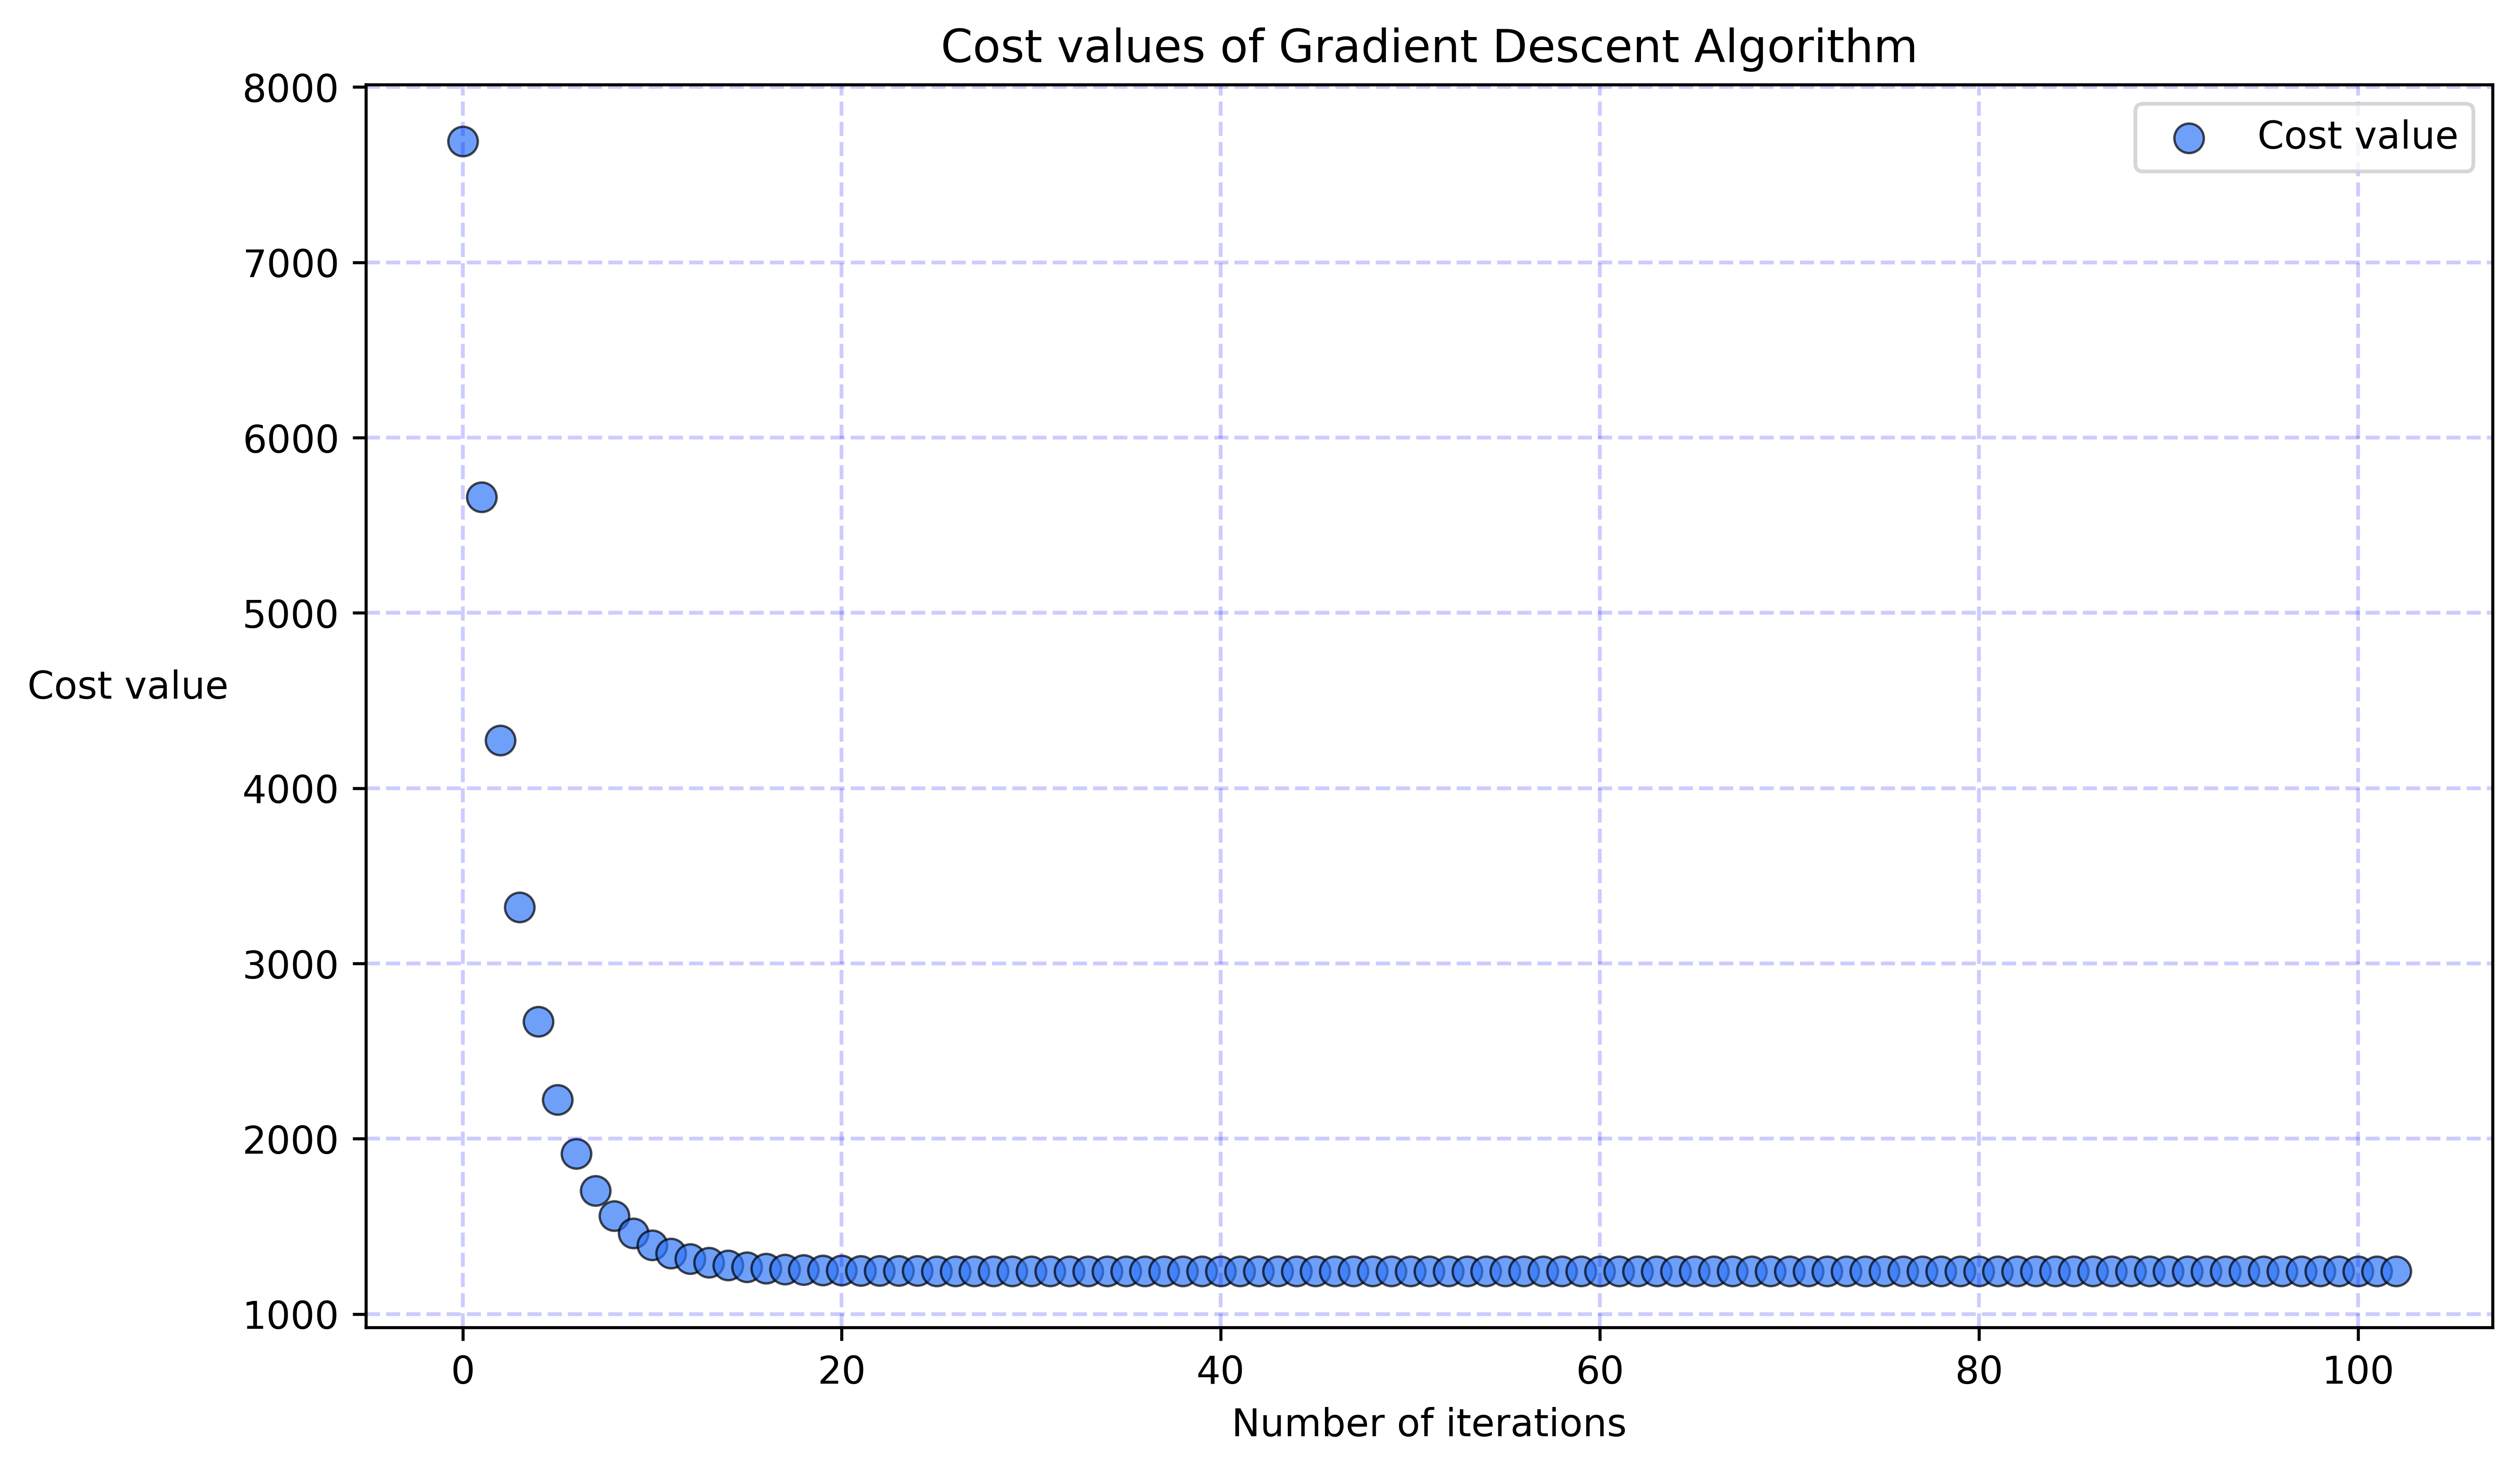

In [6]:
# Plot Cost function graph
J = model.loss

plt.figure(figsize=(10,6), dpi=600)
plt.title('Cost values of Gradient Descent Algorithm')
plt.xlabel("Number of iterations")
plt.ylabel("Cost value", rotation=0, labelpad=30)
sns.scatterplot(x=list(range(0, len(J))), y=J, color='#3176f7', 
                label='Cost value', edgecolor='black', s=60, alpha=0.7)
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc='upper right')
# plt.savefig('Cost_Gradient_Descent.jpg')
plt.show()